<img src="../../../../images/pr.png" style="background:white; display: block; margin-left: auto;margin-right: auto; width:60%"/>

---
<h2>1. Importing the Dataset</h2>

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('../../../../data/clean/Position_Salaries.csv')
display(df.head())
x = df.iloc[:, 1:-1].values
y = df.iloc[:, -1].values

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


---
<h2>2. Training the Model with the Whole Dataset</h2>

In [2]:
from sklearn.preprocessing import PolynomialFeatures

pf = PolynomialFeatures(degree=4, include_bias=True, order='C')
x_poly = pf.fit_transform(X=x, y=None)

In [3]:
from sklearn.linear_model import LinearRegression

pr = LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=-1)
pr.fit(x_poly, y)
print("intercept : {}\nslope : {}".format(pr.intercept_, pr.coef_))

intercept : 184166.66666719737
slope : [      0.         -211002.33100292   94765.44289063  -15463.28671331
     890.15151515]


---
<h2>3. Visualizing the Model Results</h2>

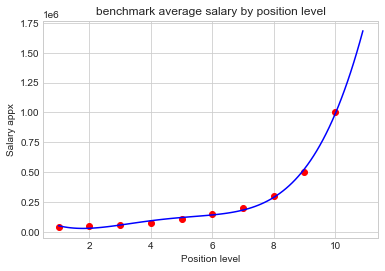

In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('seaborn-whitegrid')
%matplotlib inline

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6,4))

regression_x = np.arange(1, x.max()+1, 0.1)
regression_y = [pr.intercept_ + pr.coef_[1] * i + pr.coef_[2] * i**2 +
                pr.coef_[3] * i**3 + pr.coef_[4] * i**4 for i in regression_x]

ax.scatter(x, y, color='red')
ax.plot(regression_x, regression_y, color='blue')
ax.set_xlabel("Position level")
ax.set_ylabel("Salary appx")
ax.set_title("benchmark average salary by position level")

plt.show()

---
<h2>4. Prediction of Possible Salary based on Position Level as Input</h2>

In [5]:
post_lvl = 6.5
print("The salary estimate for for position level at {} is ${:,.2f}".format(post_lvl, pr.predict(pf.fit_transform(X=[[post_lvl]], y=None))[0]))

The salary estimate for for position level at 6.5 is $158,862.45
